# Hong Kong Weather: Data Wrangling

**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





# Data Collection
Load required packages and modules into Python. Then load the data into a pandas dataframe for ease of use.

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Save current working directory and parent path.**

In [20]:
path = os.getcwd()
parent = os.path.dirname(path) 
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution


## Load weather data from csv file

In [21]:
data_path = parent+'/data/raw/hk_weather_2014_2020.csv'
df = pd.read_csv(data_path)
df.head(3)

,Year_Month,MeanPressure(hPa),Mean DailyMax.(deg. C) Air Temperature,Mean(deg. C) Air Temperature,Mean DailyMin.(deg. C) Air Temperature,MeanDew Point(deg. C),MeanRelativeHumidity(%),MeanAmountof Cloud(%),TotalRainfall(mm),Prevailing Wind Direction,Mean Wind Speed
0,2014-1,1021.3,19.2,16.3,14.1,9.9,67,32,Trace,40,22.9
1,2014-2,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6
2,2014-3,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1


In [22]:
df.tail(3)

,Year_Month,MeanPressure(hPa),Mean DailyMax.(deg. C) Air Temperature,Mean(deg. C) Air Temperature,Mean DailyMin.(deg. C) Air Temperature,MeanDew Point(deg. C),MeanRelativeHumidity(%),MeanAmountof Cloud(%),TotalRainfall(mm),Prevailing Wind Direction,Mean Wind Speed
79,2020-8,1006.3,32.2,29.0,26.9,25.4,82,73,448.4,90,17.8
80,2020-9,1009.1,31.2,28.4,26.6,25.3,84,78,708.8,80,19.4
81,2020-10,1013.2,28.5,25.6,23.7,19.9,72,68,142.4,70,37.1


# Data Organization
Completed using cookiecutter.
See README for structure.

# Data Definition
Review column names, data types, and null values.

## Column Names

In [23]:
df.columns

Index(['Year_Month', 'MeanPressure(hPa)',
       'Mean DailyMax.(deg. C) Air Temperature',
       'Mean(deg. C) Air Temperature',
       'Mean DailyMin.(deg. C) Air Temperature', 'MeanDew Point(deg. C)',
       'MeanRelativeHumidity(%)', 'MeanAmountof Cloud(%)', 'TotalRainfall(mm)',
       'Prevailing Wind Direction', 'Mean Wind Speed'],
      dtype='object')

**Rename column names for clarity.**

In [24]:
df = df.rename(columns={'Year_Month':'Date',
        'MeanPressure(hPa)':'Mean Pressure (hPa)',
       'Mean DailyMax.(deg. C) Air Temperature':'Mean Daily Max Air Temp (C°)',
       'Mean(deg. C) Air Temperature':'Mean Air Temp (C°)',
       'Mean DailyMin.(deg. C) Air Temperature':'Mean Daily Min Air Temp (C°)',
        'MeanDew Point(deg. C)':'Mean Dew Point (C°)',
       'MeanRelativeHumidity(%)':'Mean Relative Humidity (%)',
        'MeanAmountof Cloud(%)':'Mean Amount of Cloud Coverage (%)',
        'TotalRainfall(mm)':'Total Rainfall (mm)',
       'Prevailing Wind Direction':'Prevailing Wind Direction (degrees)',
        'Mean Wind Speed':'Mean Wind Speed (km/h)'})
df.head(3)

,Date,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h)
0,2014-1,1021.3,19.2,16.3,14.1,9.9,67,32,Trace,40,22.9
1,2014-2,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6
2,2014-3,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1


## Data Types
Review which columns are integer, float, categorical, or dates. Ensure the data type is loaded properly into dataframe.

In [25]:
df.dtypes

Date                                    object
Mean Pressure (hPa)                    float64
Mean Daily Max Air Temp (C°)           float64
Mean Air Temp (C°)                     float64
Mean Daily Min Air Temp (C°)           float64
Mean Dew Point (C°)                    float64
Mean Relative Humidity (%)               int64
Mean Amount of Cloud Coverage (%)        int64
Total Rainfall (mm)                     object
Prevailing Wind Direction (degrees)      int64
Mean Wind Speed (km/h)                 float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 82 non-null     object 
 1   Mean Pressure (hPa)                  82 non-null     float64
 2   Mean Daily Max Air Temp (C°)         82 non-null     float64
 3   Mean Air Temp (C°)                   82 non-null     float64
 4   Mean Daily Min Air Temp (C°)         82 non-null     float64
 5   Mean Dew Point (C°)                  82 non-null     float64
 6   Mean Relative Humidity (%)           82 non-null     int64  
 7   Mean Amount of Cloud Coverage (%)    82 non-null     int64  
 8   Total Rainfall (mm)                  82 non-null     object 
 9   Prevailing Wind Direction (degrees)  82 non-null     int64  
 10  Mean Wind Speed (km/h)               82 non-null     float64
dtypes: float64(6), int64(3), object(2)

# Data Cleaning

## Handle Missing Data
Replace 'trace' and 'tr' with a value of 1 mm of rainfall

In [27]:
df['Total Rainfall (mm)'] = df['Total Rainfall (mm)'].replace(['Tr','Trace'],1).astype('float64')

### Change Date to Period datatype

In [28]:
df['Date Period'] = pd.PeriodIndex(df.Date, freq='M')
df = df[['Date Period', 'Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)']]

In [29]:
# Re-examine datatypes
df.dtypes

Date Period                            period[M]
Mean Pressure (hPa)                      float64
Mean Daily Max Air Temp (C°)             float64
Mean Air Temp (C°)                       float64
Mean Daily Min Air Temp (C°)             float64
Mean Dew Point (C°)                      float64
Mean Relative Humidity (%)                 int64
Mean Amount of Cloud Coverage (%)          int64
Total Rainfall (mm)                      float64
Prevailing Wind Direction (degrees)        int64
Mean Wind Speed (km/h)                   float64
dtype: object

In [30]:
## Number of null values
print('There are {} null values.'.format(df.isnull().sum().sum()))

There are 0 null values.


# Peek into visualizing data

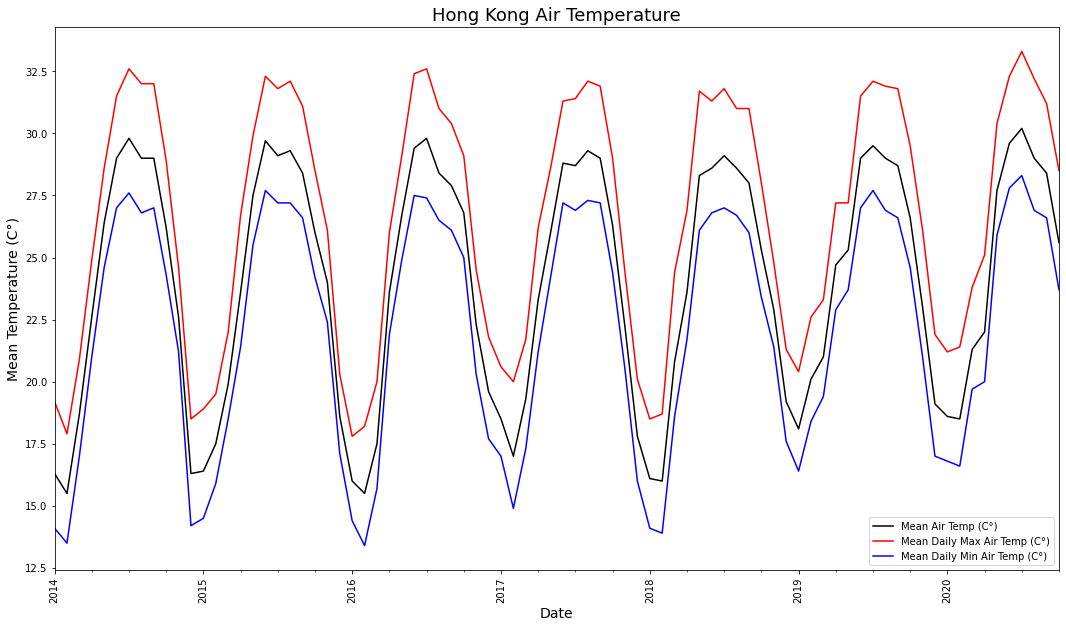

In [31]:
temp_df = df[['Date Period','Mean Air Temp (C°)','Mean Daily Max Air Temp (C°)','Mean Daily Min Air Temp (C°)']]
fig = temp_df.plot(x='Date Period',color=['black','red','blue'],figsize=(18,10)).get_figure()
plt.xticks(rotation=90)
plt.xlabel('Date', size=14)
plt.ylabel('Mean Temperature (C°)', size=14)
plt.title('Hong Kong Air Temperature', size=18)

fig.savefig(parent+'/visualizations/HK_air_temp_period_graph.jpg')

# Export data to new csv file

In [32]:
df.to_csv(parent+'/data/interim/cleaned_weather_2014_2020.csv')